#### Importing required libraries

In [10]:
import requests
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Function to get the tags of a particular question

In [11]:
def return_tags(url):
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the problem tags and rating
        tags = [tag.text for tag in soup.find_all('span', class_='tag-box')]
        
        return tags
    
    else:
        print("Failed to fetch page:", response.status_code)

#### Function to scrape the data of a user

In [12]:
def scrape_data(username):
    url = "https://codeforces.com/submissions/" + username + "/page/1"
    res = requests.get(url)
    htmlData = res.content
    parsedData = BeautifulSoup(htmlData, "html.parser")
    parsedData
    
    question = parsedData.findAll("td", {"class" : "status-small", "data-problemid": True})
    verdicts = parsedData.findAll("span", {"class" : "submissionVerdictWrapper"})

    # do it for all questions 
    question = question[0:]
    verdicts = verdicts[0:]

    # make a dictionary of (name, link, rating, dp, greedy, binary_search, verdict)
    dict = []

    for tag, verdict in zip(question, verdicts):
        a_tag = tag.find('a')
        if a_tag:
            text = a_tag.get_text(strip=True)
            href = "https://codeforces.com" + a_tag['href']
            # print("Text:", text)
            # print("Href:", href)
            # print(verdict.getText(strip=True))
            
            # remove commas from text
            text = text.replace(',', '')
            
            tags = return_tags(href)
            tags_list = []
            # remove /r and /n from the tags
            for tag in tags:
                tags_list.append(tag.replace('\r', '').replace('\n', '').replace('  ', ''))

                
            rating = tags_list[-1]
            rating = rating[1:]
            
            # if rating cannot be converted to int, then continue
            try:
                rating = int(rating)
            except:
                continue

            tag_list = tags_list.pop()
            
            dp = 0
            greedy = 0
            binary_search = 0
            if "dp" in tags_list:
                dp = 1
            if "greedy" in tags_list:
                greedy = 1
            if "binary search" in tags_list:
                binary_search = 1
                                
            dict.append([text, href, rating, dp, greedy, binary_search, verdict.getText(strip=True)])
            
    for d in dict:
        print(d)        
    
    
    # store the data of the user in a .csv file named 'user.csv'
    import csv
    with open('user.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Name", "Link", "Rating", "DP", "Greedy", "Binary Search", "Verdict"])
        for row in dict:
            writer.writerow(row)
    

#### Plot the Expert data on the graph

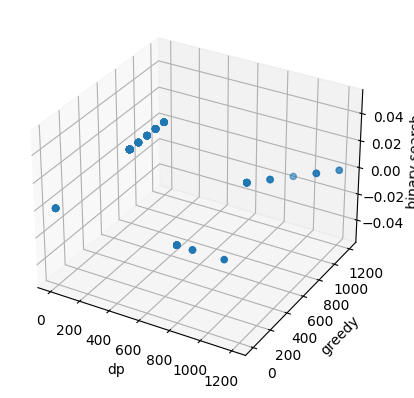

In [13]:
points = []
with open('final.csv', 'r') as f:
    lines = f.readlines()
    x = []
    y = []
    z = []
    names = []
    links = []
    flag = 0
    for line in lines:
        if flag == 0:
            flag = 1
            continue
        data = line.split(',')
        name = data[0]
        link = data[1]
        rating = data[2]
        if data[3] == 'yes':
            dp = 1
        else:
            dp = 0
        if data[4] == 'yes':
            greedy = 1
        else:
            greedy = 0
        if data[5] == 'yes':
            binary_search = 1
        else:
            binary_search = 0   
            
        # print(rating, dp, greedy, binary_search)
        x.append(float(float(dp)*float(rating)))
        y.append(float(float(greedy)*float(rating)))
        z.append(float(float(binary_search)*float(rating)))
        names.append(name)
        links.append(link)
        points.append([name, link, rating, dp, greedy, binary_search])
            
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
        
    for i in range(len(x)):
        ax.text(x[i], y[i], z[i], names[i] + ' ' + links[i], visible=False)
        
    ax.set_xlabel('dp')
    ax.set_ylabel('greedy')
    ax.set_zlabel('binary search')
        
    plt.show()

#### Scrape data of the username, to compare it with the expert data

In [14]:
username = input('Enter your codeforces username: ')
scrape_data(username)
        
# open user.csv file and read the content
datapoints = []
with open('user.csv', 'r') as file:
    flag = 1
    for line in file:
        if flag == 1:
            flag = 0
            continue
        
        # temp = line.split(',')
        # for i in temp:
        #     print(i)
        
        # if verdict is accepted, then add the data to the list
        if 'Accepted' in line:
            temp = line.split(',')
            rating = float(temp[2])
            dp = float(temp[3])
            greedy = float(temp[4])
            binary_search = float(temp[5])
            if dp > 0:
                dp = dp*rating + 10
            if greedy > 0:
                greedy = greedy*rating + 10
            if binary_search > 0:
                binary_search = binary_search*rating + 10
            name = temp[0]
            link = temp[1]
            datapoints.append([name, link, dp, greedy, binary_search])
            
        else:
            temp = line.split(',')
            rating = float(temp[2])
            dp = float(temp[3])
            greedy = float(temp[4])
            binary_search = float(temp[5])
            name = temp[0]
            link = temp[1]
            if dp > 0:
                dp = dp*rating - 2
            if greedy > 0:
                greedy = greedy*rating - 2
            if binary_search > 0:
                binary_search = binary_search*rating - 2
        #     datapoints.append([name, link, dp, greedy, binary_search])
            
# print(datapoints)
for dp in datapoints:
    print(dp)

['B - Make Equal', 'https://codeforces.com/contest/1931/problem/B', 800, 0, 1, 0, 'Accepted']
['B - Make Equal', 'https://codeforces.com/contest/1931/problem/B', 800, 0, 1, 0, 'Accepted']
['B - Make Equal', 'https://codeforces.com/contest/1931/problem/B', 800, 0, 1, 0, 'Wrong answer on test2']
['A - Too Min Too Max', 'https://codeforces.com/contest/1934/problem/A', 800, 0, 1, 0, 'Accepted']
['A - Entertainment in MAC', 'https://codeforces.com/contest/1935/problem/A', 800, 0, 0, 0, 'Accepted']
['B - Rudolf and 121', 'https://codeforces.com/contest/1941/problem/B', 1000, 1, 1, 0, 'Accepted']
["A - Farmer John's Challenge", 'https://codeforces.com/contest/1942/problem/A', 800, 0, 0, 0, 'Accepted']
['A - Yogurt Sale', 'https://codeforces.com/contest/1955/problem/A', 800, 0, 0, 0, 'Accepted']
['A - Setting up Camp', 'https://codeforces.com/contest/1945/problem/A', 800, 0, 1, 0, 'Accepted']
['B - Fireworks', 'https://codeforces.com/contest/1945/problem/B', 900, 0, 0, 0, 'Accepted']
['C - Lon

#### Give recommendations using the nearest neighbours

In [15]:
dataset_points = []

for point in points:
    diff = float(point[2])
    dataset_points.append([point[0], point[1], float(point[3])*diff, float(point[4])*diff, float(point[5])*diff])
    

dis_list = []

for dp in datapoints:
    for point in dataset_points:
        distance = (float(dp[2]) - float(point[2]))**2 + (float(dp[3]) - float(point[3]))**2 + (float(dp[4]) - float(point[4]))**2
        distance = distance**0.5
        point_link = point[1]
        dp_link = dp[1]
        dis_list.append([dp_link, point_link, distance])
        
dis_list = sorted(dis_list, key=lambda x: x[-1])

recommended_points = []
flag = 0
for d in dis_list:
    if flag == 10:
        break
    if d[1] not in recommended_points:
        recommended_points.append(d[1])
        flag += 1
        
print("Following questions are recommended to solve:")
for rp in recommended_points:
    print(f'-{rp}')


Following questions are recommended to solve:
-https://codeforces.com/problemset/problem/1915/C
-https://codeforces.com/problemset/problem/1886/B
-https://codeforces.com/problemset/problem/1873/E
-https://codeforces.com/problemset/problem/1862/C
-https://codeforces.com/problemset/problem/1853/B
-https://codeforces.com/problemset/problem/1850/E
-https://codeforces.com/problemset/problem/1763/B
-https://codeforces.com/problemset/problem/1744/C
-https://codeforces.com/problemset/problem/1954/C
-https://codeforces.com/problemset/problem/1933/D
